### Metrics TR-MSE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
from utils import nn_verification, tr_mse, tr_mse_nn_output, load_generator
from models import g_unet, discriminator

Using TensorFlow backend.


In [2]:
models_path = 'trained_models/sand'
trend_num = 8
nn_name = 'nf32_dropout_eta5'
W = 256
H = 256
AA = 1
r = 1
l_0 = 1
l_1 = 15

In [3]:
f_gen = load_generator(models_path, trend_num, nn_name)

/home/ysbudakyan/anaconda3/lib/python3.6/site-packages/keras/models.py:248: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
K = (l_1 - l_0) / (W * AA)
def l0(x):
    return l_0

def l1(x):
    return l_1

def l_trend(x):
    return l_0 + K * x

In [ ]:
from models import g_unet
f_gen = g_unet(nf=32)
f_gen.load_weights('trained_models/sand/trend2/nf32/f_gen.weights')

In [8]:
nn_verification(models_path, trend_num, nn_name, f_gen, 100, W, H, l0, l1, l_trend, AA, r)

Verification:   0%|          | 0/100 [00:00<?, ?it/s]

Dir already exist


Verification: 100%|██████████| 100/100 [01:42<00:00,  1.02s/it]

NN output saved successfully.


In [9]:
verification_path = models_path + '/trend' + str(trend_num) + '/' + nn_name + '/verification'
nn_mse, nn_err, nn_tr, tr_side1, tr_side2, tr_pan  = tr_mse_nn_output(verification_path, r=1)

NN output: 100%|██████████| 100/100 [00:04<00:00, 21.82it/s]

Dir already exist
Metrics saved successfully.


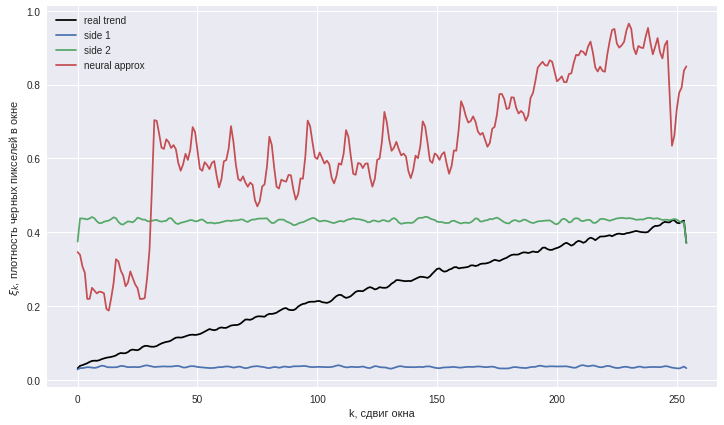

In [10]:
plt.figure(figsize=(12, 7))
plt.plot(tr_pan, label='real trend', color='black')
plt.plot(tr_side1, label='side 1')
plt.plot(tr_side2, label='side 2')
plt.plot(nn_tr, label='neural approx')
plt.xlabel('k, сдвиг окна')
plt.ylabel(r'$\xi_k$, плотность черных пикселей в окне')
plt.legend()
plt.savefig(verification_path + '/tr_1.png')

In [27]:
from PIL import Image
side1 = np.zeros((1, W, H, 1))
side2 = np.ones((1, W, H, 1))
input_data = np.concatenate((side1, side2), axis=3)
gen = f_gen.predict(input_data)
#nn_img = (127.5 * gen.reshape(W, H) + 127.5).astype('uint8')
nn_img = gen.reshape(W, H).astype('uint8') * 255
nn_img = Image.fromarray(nn_img, mode='L').convert('1')

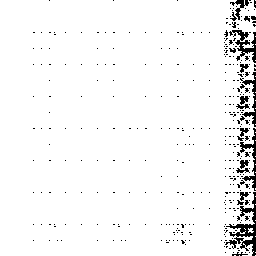

In [28]:
nn_img

In [ ]:
np.asarray(nn_img)[253, 191]

In [ ]:
from keras.backend import random_uniform_variable
from keras.backend import eval
from PIL import Image

In [ ]:
input1 = random_uniform_variable((1, 256, 256, 2), -1, 1)
input2 = random_uniform_variable((1, 256, 256, 2), -1, 1)

In [ ]:
x1 = eval(input1)
x2 = eval(input2)

In [ ]:
gen1 = f_gen.predict(x1)
gen2 = f_gen.predict(x2)

In [ ]:
img1 = (255 * gen1.reshape(256, 256)).astype('uint8')
img2 = (255 * gen2.reshape(256, 256)).astype('uint8')
im1 = Image.fromarray(img1, mode='L').convert('1')
im2 = Image.fromarray(img2, mode='L').convert('1')
im = Image.fromarray((img1 - img2), mode='L').convert('1')

In [ ]:
im1

In [ ]:
im2

In [ ]:
im

In [ ]:
side1 = np.array(image).astype('int')

In [ ]:
image.close()

In [ ]:
side1[1, 0] = 0

In [ ]:
side1